In [ ]:
!pip install git+https://github.com/forrestbao/pyeeg.git

import pandas as pd
import keras.backend as K
import numpy as np
import pandas as pd
import pyeeg as pe
import pickle as pickle
import math
from sklearn import svm
from sklearn.preprocessing import normalize

import os
import time

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-2n8ohaxy
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-2n8ohaxy
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28123 sha256=e509317f11129b43a39afdd8378ed063b19db57c2de33f5c537bfb40f64309c7
  Stored in directory: /tmp/pip-ephem-wheel-cache-g4sr5jll/wheels/2d/3f/ad/106d4fc80b61d1ea1fc18e76e7439fd98aa043d83d58eae741
Successfully built pyeeg


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D,Conv1D
from keras.models import Sequential
from keras.utils import to_categorical 

from keras.models import Model
import timeit
from keras.optimizers import SGD

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Opening Data

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/DEAP  - saved/data_training.npy', 'rb') as fileX_training:
    X_train  = np.load(fileX_training)
    
with open('/content/drive/MyDrive/Colab Notebooks/DEAP  - saved/label_training.npy', 'rb') as fileY_training:
    Y_train  = np.load(fileY_training)  
    

In [ ]:
X_train = normalize(X_train)
Z_train = np.ravel(Y_train[:, [3]])
#labels
train_arousal = np.ravel(Y_train[:, [0]])
train_valence = np.ravel(Y_train[:, [1]])
train_dominance = np.ravel(Y_train[:, [2]])
train_liking = np.ravel(Y_train[:, [3]])

In [ ]:
X_train.shape


(45675, 70)

In [ ]:

from keras.utils import to_categorical
y_train = to_categorical(Z_train)
x_train = np.array(X_train[:])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
print(y_train.shape)

(45675, 10)


In [ ]:
np.unique(x_train)

array([0.00170486, 0.00171934, 0.00194255, ..., 0.58262048, 0.58395395,
       0.58488571])

In [ ]:

with open('/content/drive/MyDrive/Colab Notebooks/DEAP  - saved/data_testing.npy', 'rb') as fileX_training:
    X_test  = np.load(fileX_training)
    
with open('/content/drive/MyDrive/Colab Notebooks/DEAP  - saved/label_testing.npy', 'rb') as fileY_training:
    Y_test  = np.load(fileY_training)

In [ ]:
X_test = normalize(X_test)
Z_test = np.ravel(Y_test[:, [3]])

test_arousal = np.ravel(Y_test[:, [0]])
test_valence = np.ravel(Y_test[:, [1]])
test_dominance = np.ravel(Y_test[:, [2]])
test_liking = np.ravel(Y_test[:, [3]])

In [ ]:
x_test = np.array(X_test[:])

In [ ]:
from keras.utils import to_categorical
y_test = to_categorical(Z_test)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test.shape

(11421, 10)

In [ ]:

from sklearn.preprocessing import StandardScaler
temp = StandardScaler()
x_train = temp.fit_transform(x_train)
x_test = temp.fit_transform(x_test)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [ ]:
x_train.shape


(45675, 70, 1)

In [ ]:
classes = 10
iter = 100
shape=(x_train.shape[1], 1)

In [ ]:
print(shape)


(70, 1)


# Building LSTM Model

In [ ]:
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2

In [ ]:
  from keras.layers import Bidirectional
  from keras.layers import LSTM

  model_LSTM = Sequential()
 # Bidirection lstm layer
  model_LSTM.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=shape))
  model_LSTM.add(Dropout(0.5))
# simple one directional lstm layer
  model_LSTM.add(LSTM(units = 256, return_sequences = True))  
  model_LSTM.add(Dropout(0.4))

  model_LSTM.add(LSTM(units = 64, return_sequences = True))  
  model_LSTM.add(Dropout(0.5))

  model_LSTM.add(LSTM(units = 64, return_sequences = True))  
  model_LSTM.add(Dropout(0.2))

  model_LSTM.add(Flatten())

# At the end adding some dense layer
  model_LSTM.add(Dense(units = 16))
  model_LSTM.add(Activation('relu'))

  model_LSTM.add(Dense(units = num_classes))
  model_LSTM.add(Activation('softmax'))
  model_LSTM.compile(optimizer ="adam", loss =keras.losses.categorical_crossentropy,metrics=["accuracy"])
  model_LSTM.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 70, 256)           133120    
_________________________________________________________________
dropout_5 (Dropout)          (None, 70, 256)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 70, 256)           525312    
_________________________________________________________________
dropout_6 (Dropout)          (None, 70, 256)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 70, 64)            82176     
_________________________________________________________________
dropout_7 (Dropout)          (None, 70, 64)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 70, 64)           

In [ ]:
  m=model_LSTM.fit(x_train, y_train,epochs=iter,batch_size=256,verbose=1,validation_data=(x_test, y_test))

Epoch 1/100
179/179 [==============================] - 38s 159ms/step - loss: 2.0234 - accuracy: 0.2416 - val_loss: 1.7207 - val_accuracy: 0.2897
Epoch 2/100
179/179 [==============================] - 26s 145ms/step - loss: 1.7440 - accuracy: 0.2866 - val_loss: 1.6943 - val_accuracy: 0.3090
Epoch 3/100
179/179 [==============================] - 26s 146ms/step - loss: 1.7168 - accuracy: 0.2979 - val_loss: 1.6787 - val_accuracy: 0.3108
Epoch 4/100
179/179 [==============================] - 26s 145ms/step - loss: 1.6967 - accuracy: 0.3028 - val_loss: 1.6668 - val_accuracy: 0.3143
Epoch 5/100
179/179 [==============================] - 26s 145ms/step - loss: 1.6799 - accuracy: 0.3139 - val_loss: 1.6466 - val_accuracy: 0.3312
Epoch 6/100
179/179 [==============================] - 26s 146ms/step - loss: 1.6652 - accuracy: 0.3212 - val_loss: 1.6276 - val_accuracy: 0.3345
Epoch 7/100
179/179 [==============================] - 26s 145ms/step - loss: 1.6578 - accuracy: 0.3179 - val_loss: 1.6204 -

In [ ]:
model_score = model_LSTM.evaluate(x_test, y_test, verbose=1)
print('Test loss:', model_score[0])
print('Test accuracy:', model_score[1])

357/357 [==============================] - 19s 53ms/step - loss: 0.6517 - accuracy: 0.8054
Test loss: 0.6516743898391724
Test accuracy: 0.8054460883140564


In [ ]:
# list all data in history
print(m.history.keys())
import matplotlib.pyplot as plt
import numpy


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Plots -  epcohs vs Accuracy/loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


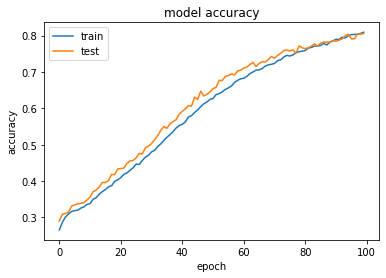

In [ ]:
import matplotlib.pyplot as plt
print(m.history.keys())
# summarize history for accuracy
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

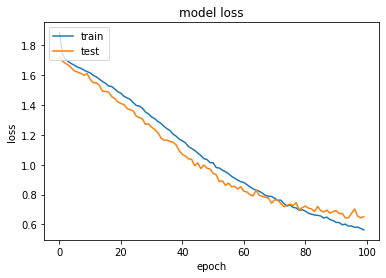

In [ ]:
# summarize history for loss
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

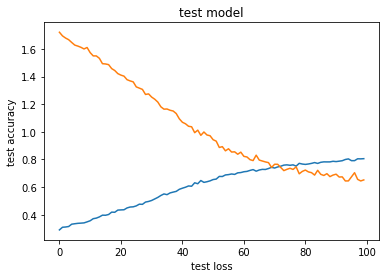

In [ ]:
plt.plot(m.history['val_accuracy'])
plt.plot(m.history['val_loss'])
plt.title('test model')
plt.ylabel('test accuracy')
plt.xlabel('test loss')
plt.show()

In [ ]:
M=m


In [ ]:
y_pred=model_LSTM.predict(x_test)
from sklearn.metrics import confusion_matrix
import numpy as np

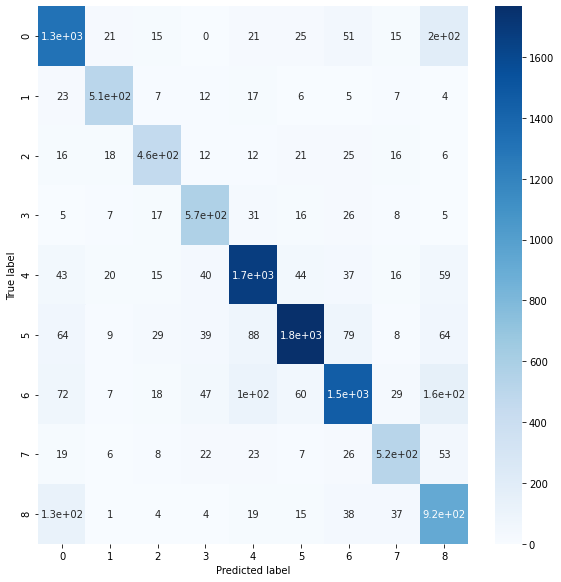

In [ ]:
y_test[1]
y_pred[1]
y_test1=np.argmax(y_test, axis=1)
y_pred=np.argmax(y_pred,axis=1)
cmatrix=confusion_matrix(y_test1, y_pred)
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cmatrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
m

# ROC curves

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
# make probability predictions with the model
predictions = model_LSTM.predict(x_test)
# round predictions 
rounded = [round(x[0]) for x in predictions]
rounded = np.array(rounded)
rounded.shape

(11421,)

In [ ]:
# make class predictions with the model
predictions = model_LSTM.predict_classes(x_test)

In [ ]:
temp = label_binarize(predictions,classes = [0,1,2,3,4,5,6,7,8,9] )
temp
temp1 = label_binarize(y_test,classes = [0,1,2,3,4,5,6,7,8,9] )
temp1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [ ]:
false_pr = dict()
true_pr = dict()
roc_auc = dict()
for i in range(classes-1):
    false_pr[i], true_pr[i], _ = roc_curve(temp1[:, i], temp[:, i])
    roc_auc[i] = auc(false_pr[i], true_pr[i])

false_pr["micro"], true_pr["micro"], _ = roc_curve(temp1.ravel(), temp.ravel())
roc_auc["micro"] = auc(false_pr["micro"], true_pr["micro"])

In [ ]:
classes = classes  -1
lw = 2

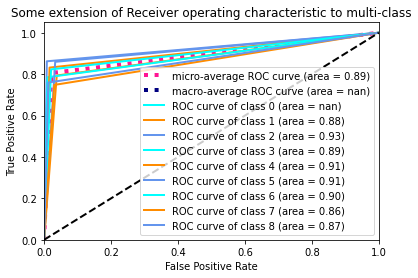

In [ ]:
combined_fpr = np.unique(np.concatenate([false_pr[i] for i in range(classes)]))

# Then interpolate all ROC curves at this points
average_tpr = np.zeros_like(combined_fpr)
for i in range(classes):
    average_tpr += interp(combined_fpr, false_pr[i], true_pr[i])

average_tpr /= (classes)

false_pr["macro"] = combined_fpr
true_pr["macro"] = average_tpr
roc_auc["macro"] = auc(false_pr["macro"], true_pr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(false_pr["micro"], true_pr["micro"],
         label='micro-average (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(false_pr["macro"], true_pr["macro"],
         label='macro-average(area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(classes), colors):
    plt.plot(false_pr[i], true_pr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
cm = cmatrix
cm

array([[1317,   21,   15,    0,   21,   25,   51,   15,  195],
       [  23,  506,    7,   12,   17,    6,    5,    7,    4],
       [  16,   18,  460,   12,   12,   21,   25,   16,    6],
       [   5,    7,   17,  568,   31,   16,   26,    8,    5],
       [  43,   20,   15,   40, 1677,   44,   37,   16,   59],
       [  64,    9,   29,   39,   88, 1767,   79,    8,   64],
       [  72,    7,   18,   47,  104,   60, 1462,   29,  156],
       [  19,    6,    8,   22,   23,    7,   26,  518,   53],
       [ 128,    1,    4,    4,   19,   15,   38,   37,  924]])

In [ ]:
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

In [ ]:
print(recall)
print(precision)

[0.79337349 0.86201022 0.78498294 0.83162518 0.8595592  0.82300885
 0.74782609 0.75953079 0.78974359]
[0.78067576 0.85042017 0.80279232 0.76344086 0.84186747 0.90107088
 0.83590623 0.79204893 0.63028649]


In [ ]:
print("Recall",np.nanmean(recall))
print("Recall",np.nanmean(precision))

Recall 0.8057400391185783
Recall 0.7998343458798085
